<a href="https://colab.research.google.com/github/ParkEunhee999/Data-Analysis-with-Open-Source/blob/main/%EC%98%A4%ED%94%88%EC%86%8C%EC%8A%A4_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D_4%EA%B0%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# 오픈소스 기반 데이터 분석 4강 - 데이터 수집


## 4-1 CSV 파일 읽기

In [ ]:
import pandas as pd

## data.csv 파일 읽기
df = pd.read_csv('data.csv', encoding='utf-8', sep=',', header=0,
                 index_col=None, skiprows=None, nrows=None)

print(df)

           날짜    체중  골격근량  체지방량
0  2025.02.06  64.7  30.0  11.1
1  2025.02.04  64.0  29.3  11.6


## 4-2 JSON 파일 읽기



In [ ]:
import json
import pandas as pd

## data.json 파일 출력
with open('data.json', mode='r', encoding='utf-8') as f:
    data = json.load(f)
print(data)

## data.json 파일 DataFrame 읽기
df = pd.read_json('data.json', orient='records', encoding='utf-8', )

print(df)

{'매출데이터': [{'월': '2025-01', '매출액': 1000000, '비용': 700000, '이익': 300000}, {'월': '2025-02', '매출액': 1200000, '비용': 800000, '이익': 400000}, {'월': '2025-03', '매출액': 1500000, '비용': 900000, '이익': 600000}]}
                                               매출데이터
0  {'월': '2025-01', '매출액': 1000000, '비용': 700000,...
1  {'월': '2025-02', '매출액': 1200000, '비용': 800000,...
2  {'월': '2025-03', '매출액': 1500000, '비용': 900000,...


In [3]:
# 한글 처리를 위한 matplotlib 설정 (1)

!sudo apt-get install -y fonts-nanum
!sudo fc-cache –fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.


In [1]:
# 한글 처리를 위한 matplotlib 설정 (2)

import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

In [2]:
import json
import pandas as pd

## energyinfo.json 파일 출력
with open('energyinfo.json', mode='r', encoding='utf-8') as f:
    data = json.load(f)
print(data)

## 데이터 변환
result = []
for item in data:
    for date_key, values in item.items():
        new_item = values.copy()
        new_item['date'] = date_key
        result.append(new_item)
print(result)

## json.dump를 이용한 저장
with open('output.json', mode='w', encoding='utf-8') as f:
    json.dump(result, f, indent=4, ensure_ascii=False)

## output.json 파일 DataFrame 읽기
#df = pd.read_json('output.json', orient='records', encoding='utf-8')

df = pd.DataFrame(result)
print(df)

[{'201501': {'heat': 532, 'waterHot': 132, 'gas': 5, 'elect': 674, 'waterCool': 176}}, {'201502': {'heat': 435, 'waterHot': 126, 'gas': 5, 'elect': 639, 'waterCool': 174}}, {'201503': {'heat': 329, 'waterHot': 123, 'gas': 4, 'elect': 532, 'waterCool': 173}}, {'201504': {'heat': 157, 'waterHot': 106, 'gas': 3, 'elect': 554, 'waterCool': 180}}, {'201505': {'heat': 51, 'waterHot': 88, 'gas': 2, 'elect': 506, 'waterCool': 184}}, {'201506': {'heat': 29, 'waterHot': 63, 'gas': 2, 'elect': 539, 'waterCool': 198}}, {'201507': {'heat': 25, 'waterHot': 50, 'gas': 2, 'elect': 565, 'waterCool': 200}}, {'201508': {'heat': 24, 'waterHot': 40, 'gas': 2, 'elect': 751, 'waterCool': 207}}, {'201509': {'heat': 28, 'waterHot': 52, 'gas': 2, 'elect': 531, 'waterCool': 200}}, {'201510': {'heat': 78, 'waterHot': 76, 'gas': 2, 'elect': 493, 'waterCool': 192}}, {'201511': {'heat': 236, 'waterHot': 94, 'gas': 2, 'elect': 560, 'waterCool': 187}}, {'201512': {'heat': 425, 'waterHot': 118, 'gas': 3, 'elect': 596, 

In [3]:
## date 컬럼에서 year와 month 추출
df['year'] = df['date'].str[:4]
df['month'] = df['date'].str[4:].astype(int)

## season 컬럼 추가
def get_season(month):
    if 3 <= month <= 5:
        return '봄'
    elif 6 <= month <= 8:
        return '여름'
    elif 9 <= month <= 11:
        return '가을'
    else:
        return '겨울'
df['season'] = df['month'].apply(get_season)

## 열 순서 재배치
df = df[['date', 'year', 'season', 'heat', 'waterHot', 'gas', 'elect', 'waterCool']]

print(df)

       date  year season  heat  waterHot  gas  elect  waterCool
0    201501  2015     겨울   532       132    5    674        176
1    201502  2015     겨울   435       126    5    639        174
2    201503  2015      봄   329       123    4    532        173
3    201504  2015      봄   157       106    3    554        180
4    201505  2015      봄    51        88    2    506        184
..      ...   ...    ...   ...       ...  ...    ...        ...
115  202408  2024     여름    28        51    1   1292        258
116  202409  2024     가을    28        53    1   1081        253
117  202410  2024     가을    64        91    1    696        246
118  202411  2024     가을   210       118    2    646        243
119  202412  2024     겨울   514       155    3    711        241

[120 rows x 8 columns]


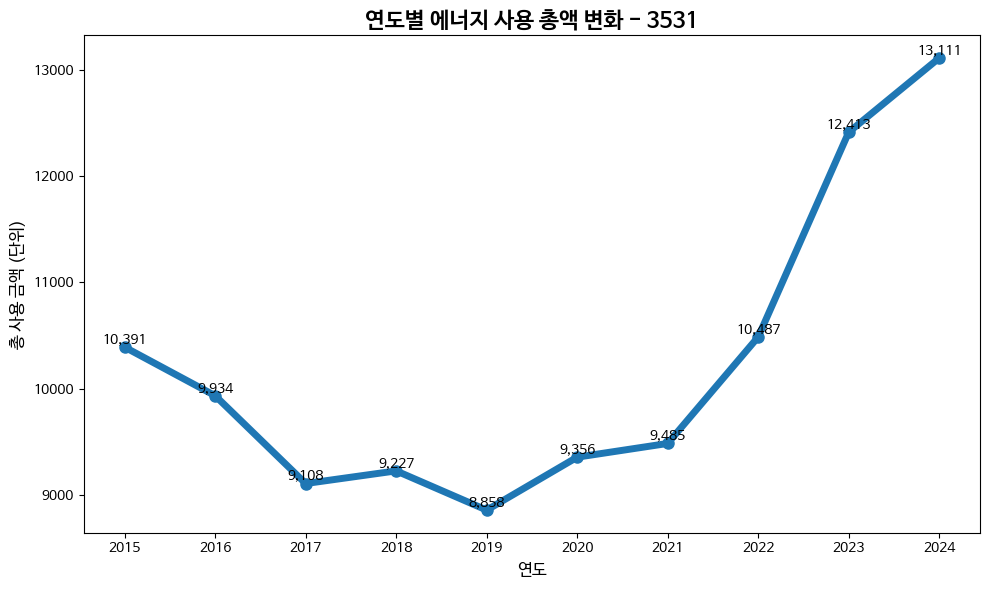


=== 연도별 에너지 사용 총액 ===
year
2015    10391
2016     9934
2017     9108
2018     9227
2019     8858
2020     9356
2021     9485
2022    10487
2023    12413
2024    13111
Name: total, dtype: int64


In [5]:
import matplotlib.pyplot as plt

## 에너지 사용 총액 계산 (전기 + 가스 + 난방 + 급탕)
df['total'] = df['elect'] + df['gas'] + df['heat'] + df['waterHot']
## 연도별로 그룹화하여 총액 합계 계산
yearly_total = df.groupby('year')['total'].sum()
## 선그래프 설정
plt.figure(figsize=(10, 6))
plt.title('연도별 에너지 사용 총액 변화 - 3531', fontsize=16, fontweight='bold')

plt.plot(yearly_total.index, yearly_total.values, marker='o', linewidth=5, markersize=8)
plt.xlabel('연도', fontsize=12)
plt.ylabel('총 사용 금액 (단위)', fontsize=12)

## 각 데이터 포인트에 값 표시
for x, y in zip(yearly_total.index, yearly_total.values):
    plt.text(x, y, f'{y:,.0f}', ha='center', va='bottom', fontsize=10)

## 레이아웃 조정 및 그래프 표시
plt.tight_layout()
plt.show()

## 연도별 총액 데이터 출력
print("\n=== 연도별 에너지 사용 총액 ===")
print(yearly_total)

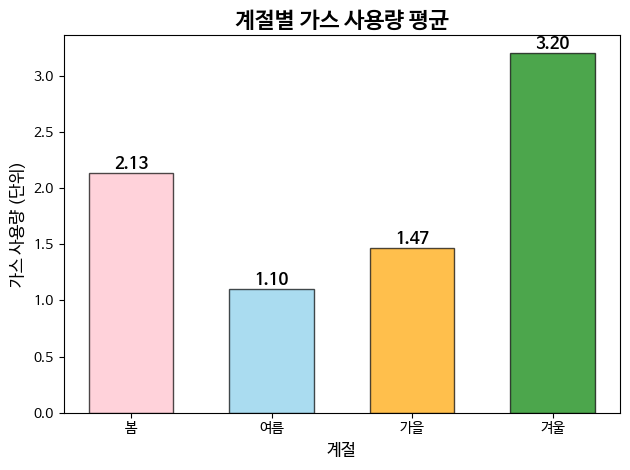


=== 계절별 가스 사용량 평균 ===
season
봄     2.133333
여름    1.100000
가을    1.466667
겨울    3.200000
Name: gas, dtype: float64


In [10]:
## 계절별 가스 사용량 평균 계산
season_gas_avg = df.groupby('season')['gas'].mean()

## 계절 순서 지정 (봄, 여름, 가을, 겨울 순서로)
season_order = ['봄', '여름', '가을', '겨울']
season_gas_avg = season_gas_avg.reindex(season_order)

## 막대 그래프 설정
bars = plt.bar(season_gas_avg.index, season_gas_avg.values,
               color=['pink', 'skyblue', 'orange', 'green'],
               edgecolor='black', alpha=0.7, width=0.6)
plt.title('계절별 가스 사용량 평균', fontsize=16, fontweight='bold')
plt.xlabel('계절', fontsize=12)
plt.ylabel('가스 사용량 (단위)', fontsize=12)

## 각 막대 위에 수치 표시
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height, f'{height:.2f}',
             ha='center', va='bottom', fontsize=12, fontweight='bold')

## 레이아웃 조정 및 그래프 표시
plt.tight_layout()
plt.show()

## 계절별 가스 평균 데이터 출력
print("\n=== 계절별 가스 사용량 평균 ===")
print(season_gas_avg)

## 4-3 텍스트 파일 읽기 및 데이터 추출

In [ ]:
import re

## 파일(callcenter20250301.log) 오픈 및 읽기
with open('callcenter20250301.log', 'r', encoding='utf-8') as f:
    content = f.read()
## 주민등록번호 패턴 생성
pattern = re.compile(r'(\d{6})-(\d{7})')

## 주민등록번호 마스킹
masked_content = pattern.sub(r'\1-*******', content)

## 마스킹된 파일(callcenter20250301_masked.log) 오픈 및 쓰기
with open('callcenter20250301_masked.log', mode='w') as f:
    f.write(masked_content)

print("주민등록번호 마스킹 완료. 'callcenter20250301_masked.log.txt' 파일로 저장되었습니다.")

주민등록번호 마스킹 완료. 'callcenter20250301_masked.log.txt' 파일로 저장되었습니다.


## 4-4 Open-Meteo의 무료 날씨 API를 통한 특정 지역 온도 조회

In [ ]:
import requests
import json

url = "https://api.open-meteo.com/v1/forecast?=&=&current=temperature_2m"
params = {
    "latitude": "37.58638333",
    "longitude": "127.0203333",
    "current": "temperature_2m"
}

try:
    ## URL 및 파라미터 전송
    response = requests.get(url, params=params)
    response.raise_for_status()

    ## JSON 데이터 읽기
    data = response.json()

    print("API 응답:", data)
    print("서울시 종로구의 현재 온도는 : {0}{1} 입니다.".format(data['current']['temperature_2m'], data['current_units']['temperature_2m']))

except requests.exceptions.RequestException as e:
    print(f"API 호출 실패: {e}")
except json.JSONDecodeError as e:
    print(f"JSON 파싱 실패: {e}")

API 응답: {'latitude': 37.6, 'longitude': 127.0, 'generationtime_ms': 0.019788742065429688, 'utc_offset_seconds': 0, 'timezone': 'GMT', 'timezone_abbreviation': 'GMT', 'elevation': 29.0, 'current_units': {'time': 'iso8601', 'interval': 'seconds', 'temperature_2m': '°C'}, 'current': {'time': '2025-09-16T13:30', 'interval': 900, 'temperature_2m': 23.7}}
서울시 종로구의 현재 온도는 : 23.7°C 입니다.


## 4-5 Selenium과 lxml을 이용한 웹 스크래핑

In [ ]:
!curl -o google-chrome-stable_current_amd64.deb https://dl.google.com/linux/direct/google-chrome-stable_current_amd64.deb
!apt install ./google-chrome-stable_current_amd64.deb -y
!pip install selenium webdriver_manager

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  115M  100  115M    0     0  19.7M      0  0:00:05  0:00:05 --:--:-- 24.1M
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'google-chrome-stable' instead of './google-chrome-stable_current_amd64.deb'
google-chrome-stable is already the newest version (140.0.7339.127-1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [ ]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service as ChromeService
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from lxml import html
import time

chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')               # 브라우저 창 없이 실행
chrome_options.add_argument('--no-sandbox')             # 보안모드 비활성화 (Colab 필수)
chrome_options.add_argument('--disable-dev-shm-usage')  # 메모리 부족 방지 (Colab 필수)
chrome_options.add_argument('--window-size=1920x1080')  # 창 크기 설정(가상)
chrome_options.add_argument('--disable-gpu')            # GPU 가속 비활성화 (일부 환경 안정성)
chrome_options.binary_location = "/usr/bin/google-chrome-stable"  # Colab용 크롬 경로 지정

## 드라이버 실행
driver = webdriver.Chrome(options=chrome_options)

## 사이트 접속
url = 'https://github.com/jaehwachung/Data-Analysis-with-Open-Source'
driver.get(url)

## 사이트 접속 대기
time.sleep(2)

## 페이지 제목 출력
page_source = driver.page_source
tree = html.fromstring(page_source)

title_text = tree.xpath('//title/text()')
print(title_text)

## 드라이버 종료
driver.quit()

['GitHub - jaehwachung/Data-Analysis-with-Open-Source: Data Analysis with Open Source']



# 실습 시나리오

## 공공데이터 포털 가입 및 데이터 신청

- [https://www.data.go.kr](https://www.data.go.kr)
- 한국환경공단 에어코리아 대기오염정보 데이터 신청

In [ ]:
import requests

## 데이터 수집 url 및 api key 설정
url = 'http://apis.data.go.kr/B552584/ArpltnInforInqireSvc/getCtprvnRltmMesureDnsty'
api_key = ''

params = {
    'serviceKey': api_key,
    'returnType': 'json',
    'numOfRows': '100',
    'pageNo': '1',
    'sidoName': '서울',
    'ver': '1.0'
}

## 데이터 수집
response = requests.get(url, params=params)

## 호출 성공/실패 출력
print(response.json())


{'response': {'body': {'totalCount': 40, 'items': [{'so2Grade': '1', 'coFlag': None, 'khaiValue': '39', 'so2Value': '0.002', 'coValue': '0.4', 'pm25Flag': None, 'pm10Flag': None, 'o3Grade': '1', 'pm10Value': '11', 'khaiGrade': '1', 'pm25Value': '8', 'sidoName': '서울', 'no2Flag': None, 'no2Grade': '1', 'o3Flag': None, 'pm25Grade': '1', 'so2Flag': None, 'dataTime': '2025-09-16 23:00', 'coGrade': '1', 'no2Value': '0.024', 'stationName': '중구', 'pm10Grade': '1', 'o3Value': '0.022'}, {'so2Grade': '1', 'coFlag': None, 'khaiValue': '39', 'so2Value': '0.003', 'coValue': '0.5', 'pm25Flag': None, 'pm10Flag': None, 'o3Grade': '1', 'pm10Value': '9', 'khaiGrade': '1', 'pm25Value': '8', 'sidoName': '서울', 'no2Flag': None, 'no2Grade': '1', 'o3Flag': None, 'pm25Grade': '1', 'so2Flag': None, 'dataTime': '2025-09-16 23:00', 'coGrade': '1', 'no2Value': '0.023', 'stationName': '한강대로', 'pm10Grade': '1', 'o3Value': '0.016'}, {'so2Grade': '1', 'coFlag': None, 'khaiValue': '42', 'so2Value': '0.003', 'coValue': '